# SLO Twitter Data Analysis  - Time Series Statistics

Setup the Jupyter Notebook kernel for SLO data analysis.

In [2]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-7-10-19-with-irrelevant-tweets-excluded.csv",
    "csv", False)

## Tweet Creation Time-Date Stamp Graph:

The plot of the year a Tweet was created against the # of Tweets created in that year.<br>

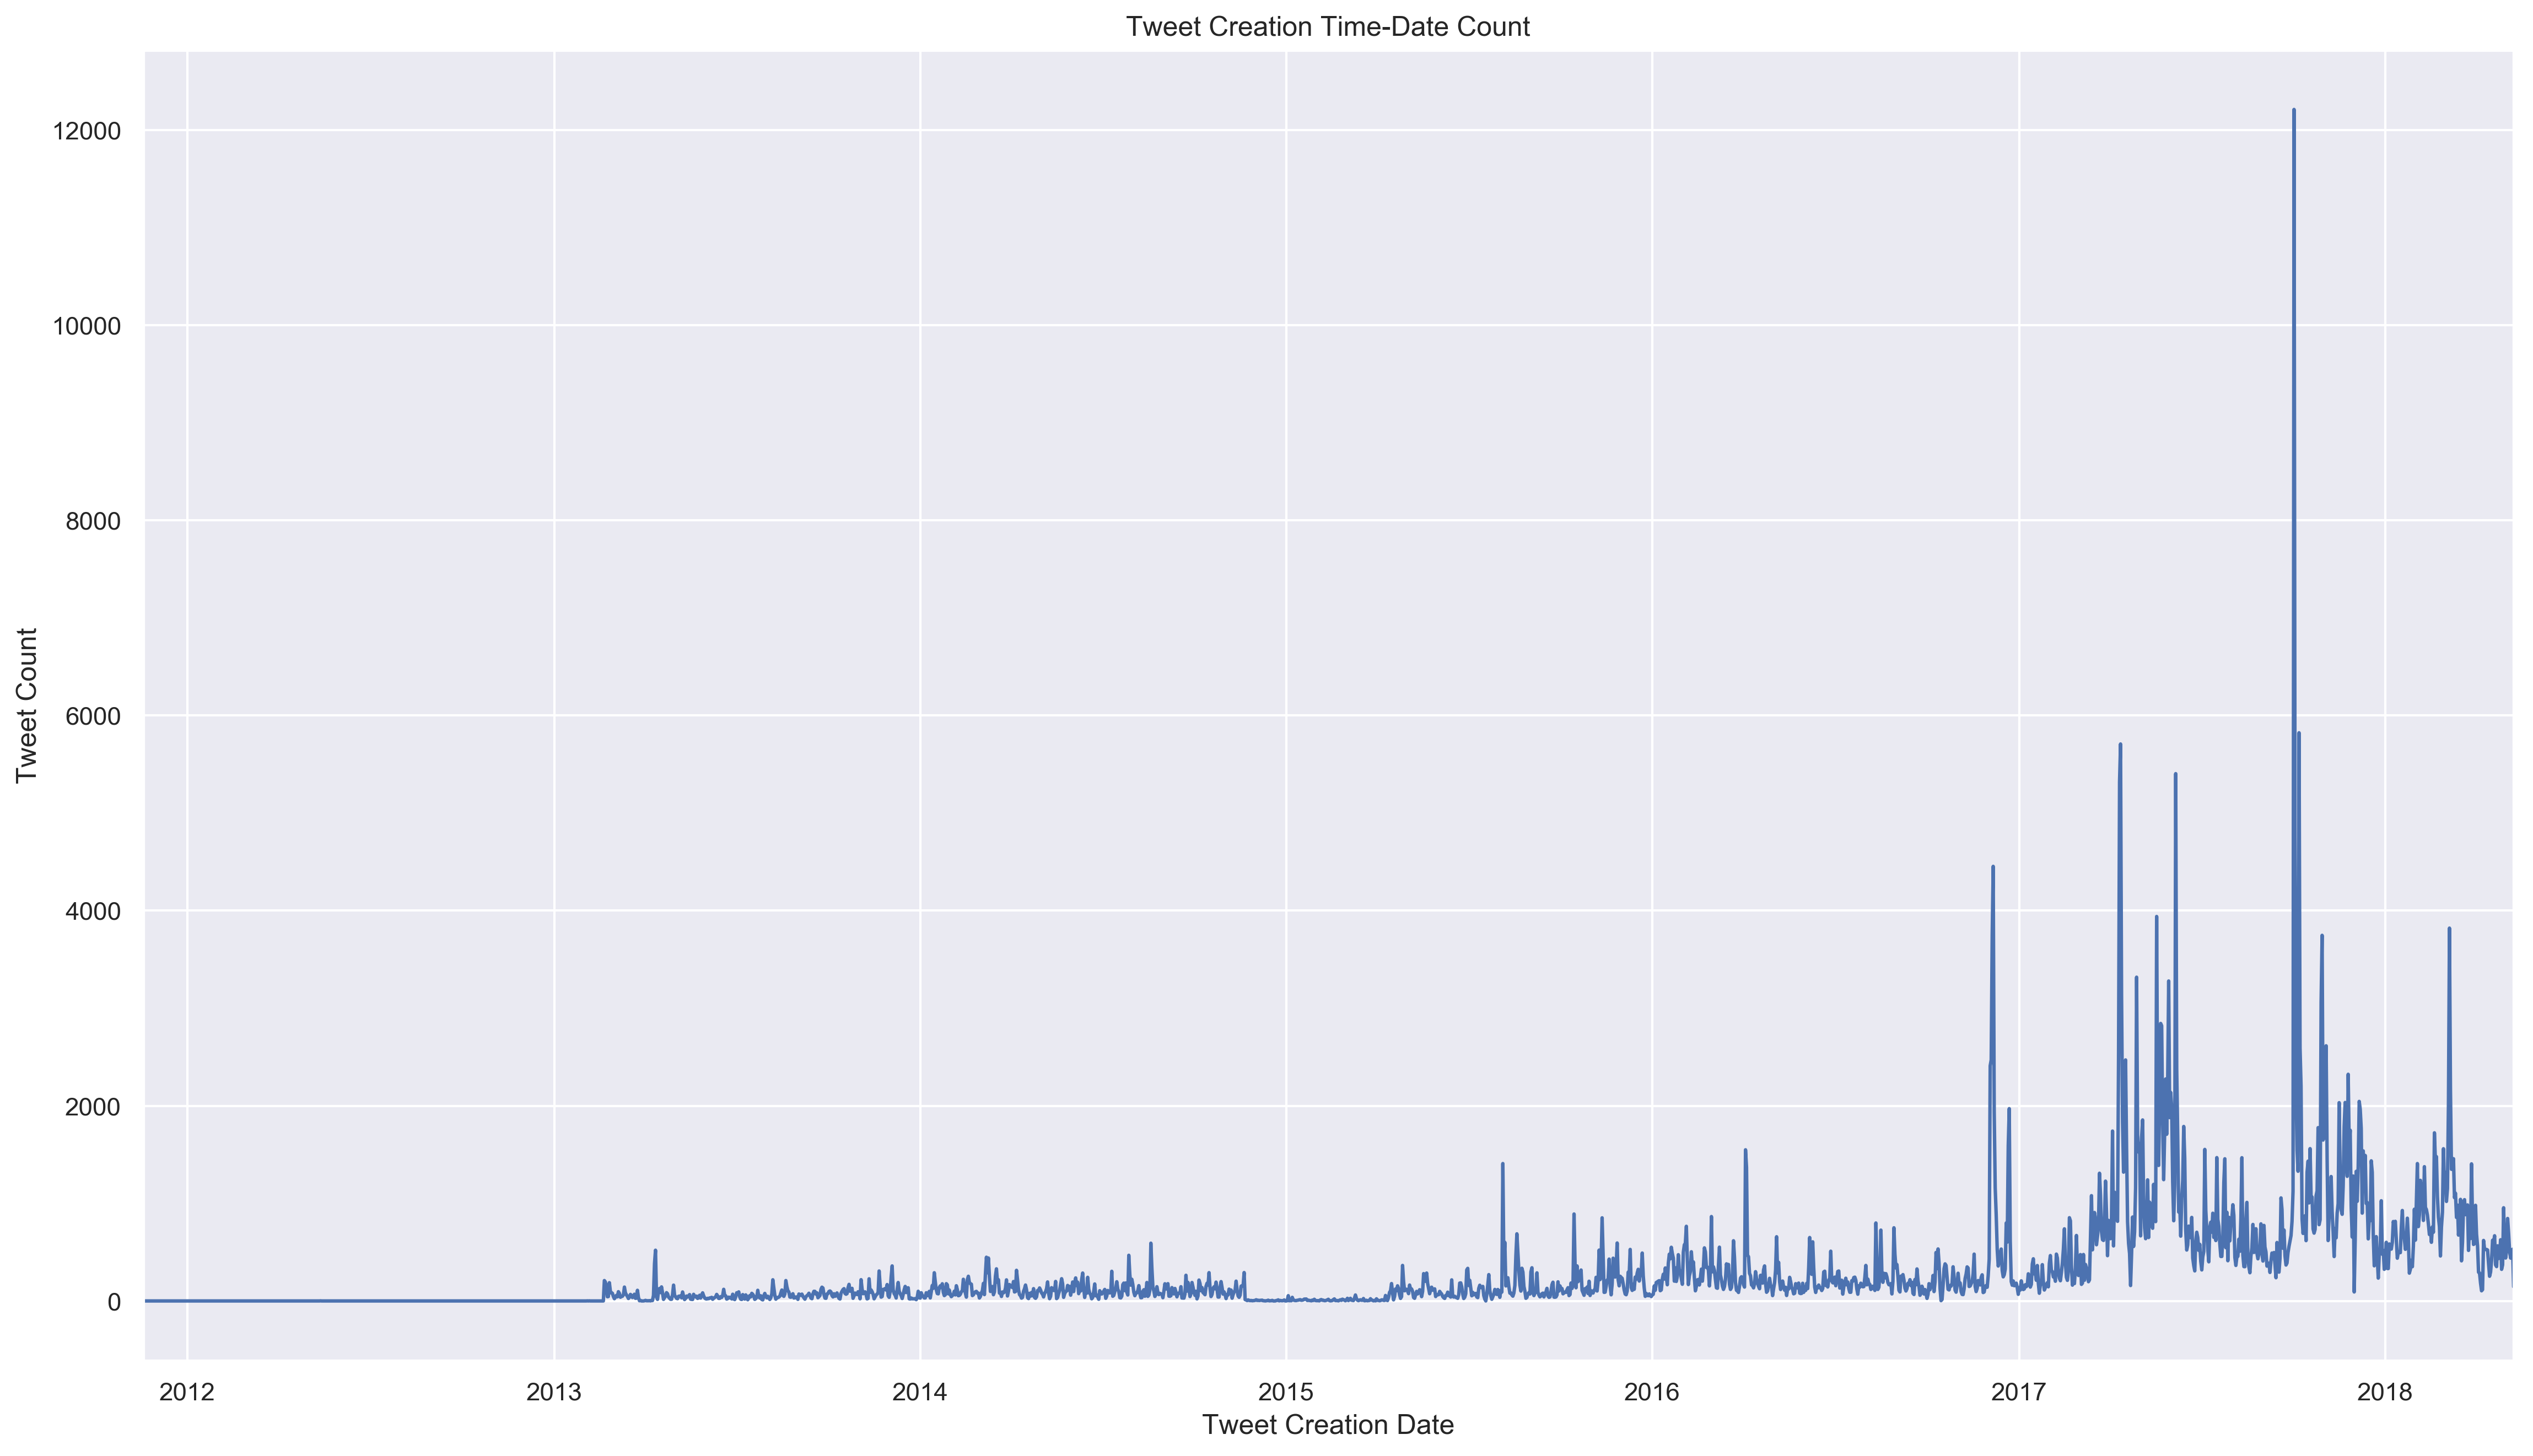

In [3]:
    plt.figure(figsize=(18.5, 10.5), dpi=300)
    plt.title(f"Tweet Creation Time-Date Count")
    plt.xlabel("Tweet Creation Date")
    plt.ylabel("Tweet Count")
    pd.to_datetime(tweet_dataframe['tweet_created_at']).value_counts().resample('1D').sum().plot()
    plt.show()

Most Tweets in our dataset are from 2017-2018.  As we go further back in time, we see substantially fewer Tweets.<br>

## Tweet Creation Time-Date Stamp by Company Graph:

This section plots the year a Tweet was created against the number of Tweets created in that year grouped by the company with which the Tweet is associated.

Note:  Y-axis tick counts are NOT the same for every company.  Adani is scaled much higher than the other companies.

Tweet Creation Time-Date Count by Company Association


<Figure size 432x288 with 0 Axes>

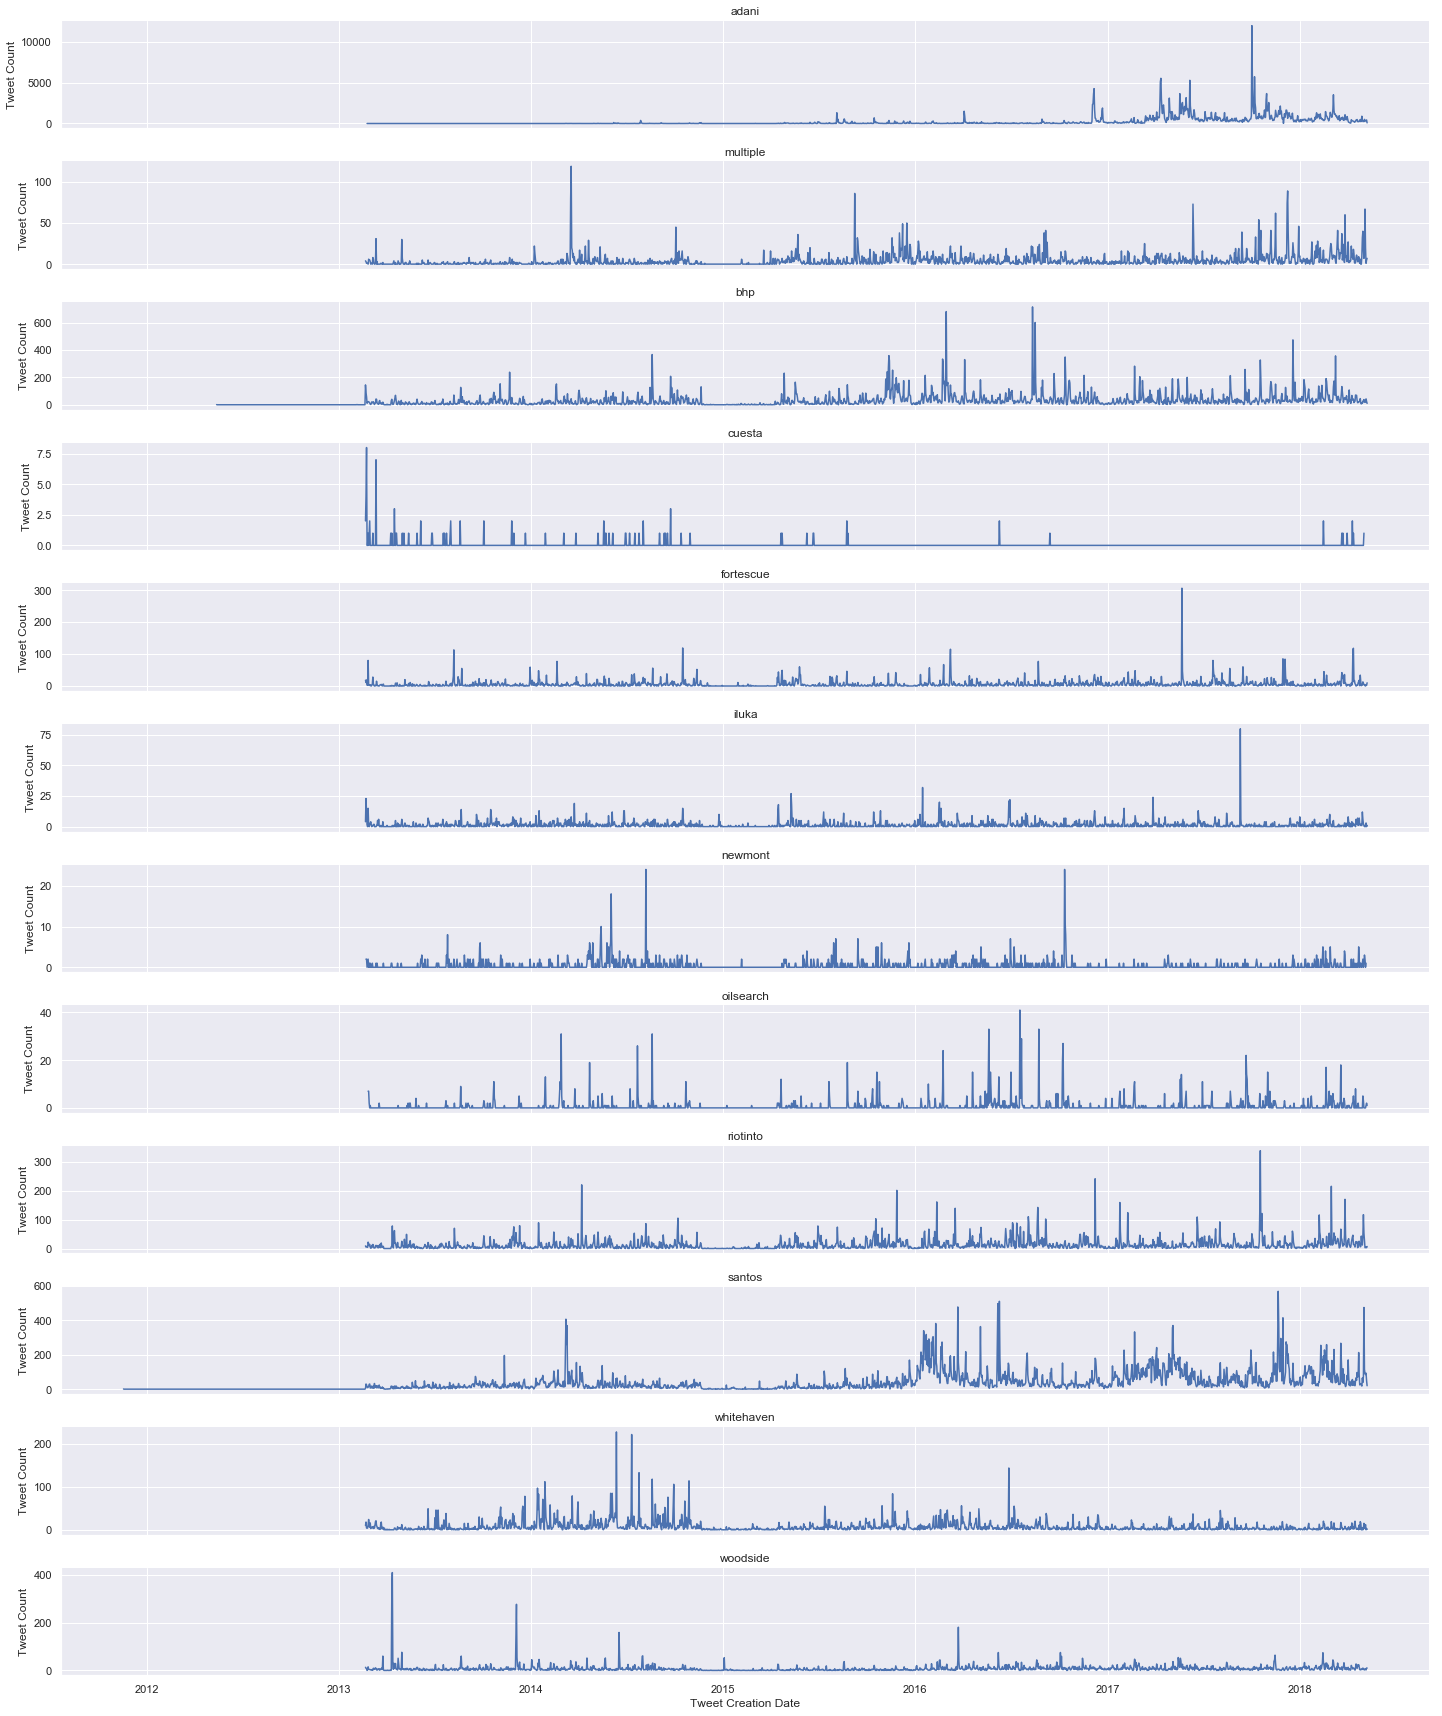

In [4]:
    plt.figure()
    print("Tweet Creation Time-Date Count by Company Association")
    grid = sns.FacetGrid(tweet_dataframe[['tweet_created_at', 'company_derived_designation']],
                         row='company_derived_designation', size=2, aspect=10, sharey=False)
    grid.map_dataframe(tweet_util_v2.ts_plot, 'tweet_created_at')
    grid.set_titles('{row_name}')
    grid.set_xlabels("Tweet Creation Date")
    grid.set_ylabels("Tweet Count")
    plt.show()

"Adani" Tweets are the most prolific and most of them are created in the 2017-2018 period.  That explains why our 1st graph was skewed heavily towards the right side.  The Tweets for the other companies are far less numerous and don't weigh as heavily in the 1st graph.<br>

## Tweet Creation Time-Date Stamp by Company and Retweets/Non-Retweets Graph:

This section distinguishes tweets (blue) from retweets (orange) over time.

Tweet Creation Time-Date Count by Company Association and Retweeted Status


<Figure size 432x288 with 0 Axes>

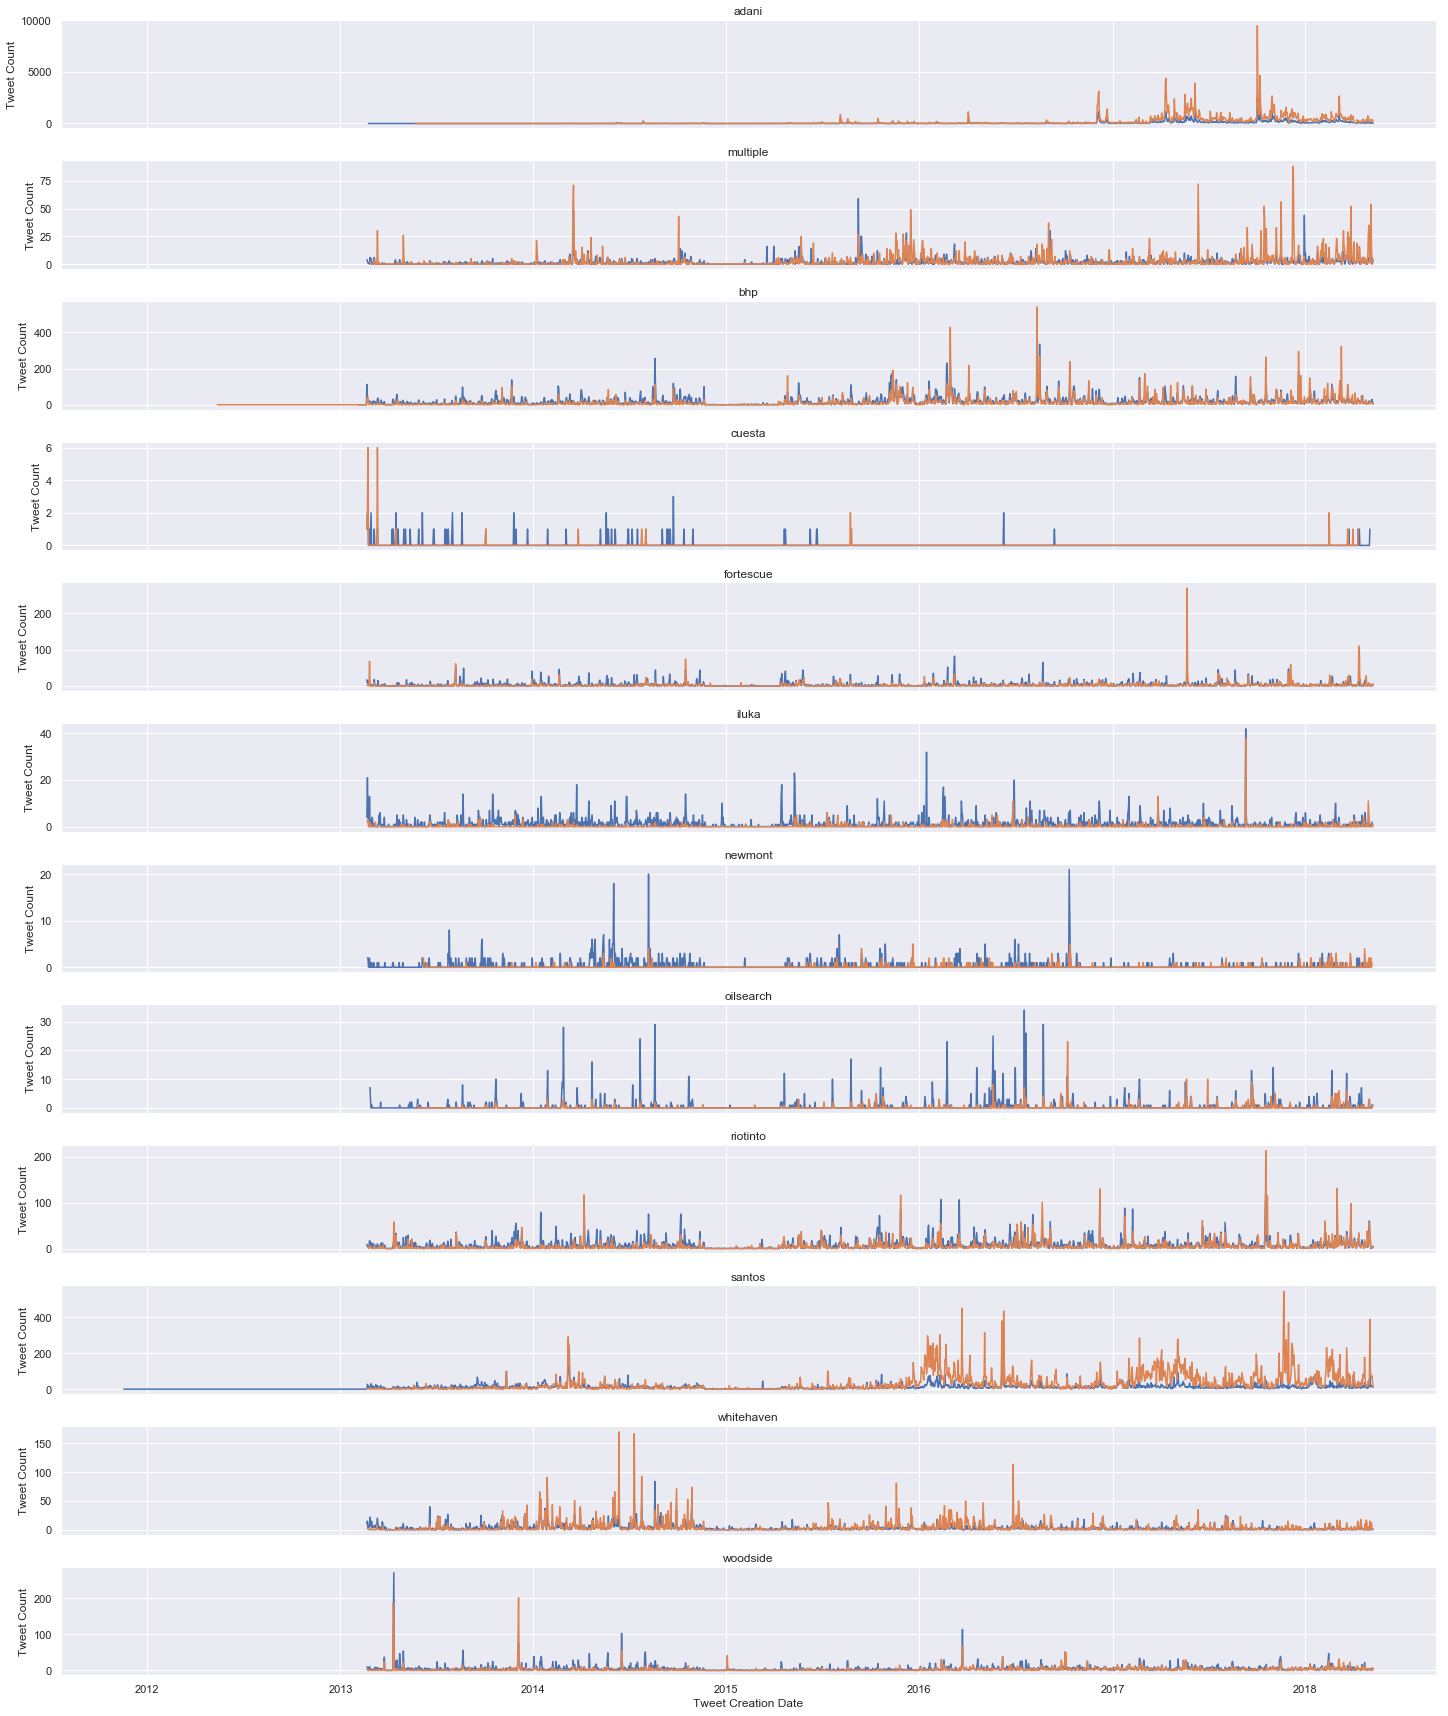

In [5]:
    plt.figure()
    print("Tweet Creation Time-Date Count by Company Association and Retweeted Status")
    grid = sns.FacetGrid(tweet_dataframe[['retweeted_derived', 'tweet_created_at', 'company_derived_designation']],
                         row='company_derived_designation', size=2, aspect=10, sharey=False)
    grid.map_dataframe(tweet_util_v2.ts_plot_2, 'tweet_created_at')
    grid.set_titles('{row_name}')
    grid.set_xlabels("Tweet Creation Date")
    grid.set_ylabels("Tweet Count")
    plt.show()

## Adani Tweets Created in 2017-2018:

In [6]:
    # Isolate Adani associated Tweets.
    adani_tweets = tweet_dataframe.loc[tweet_dataframe["company_derived_designation"] == "adani"]
    print(f"The number of Adani Tweets is {adani_tweets.shape[0]}")

    # Convert Tweet creation time to Pandas datetime type.
    adani_tweets["datetime"] = pd.to_datetime(adani_tweets["tweet_created_at"])

    # Define mask to isolate Adani Tweets created in specified time period.
    date_mask = (adani_tweets["datetime"] >= '2017-1-1') & (adani_tweets["datetime"] <= '2018-12-31')
    print(f"The # of Adani Tweets created between 2017-2018 is {adani_tweets.loc[date_mask].shape[0]}")
    print(f"The percentage of Adani Tweets created between 2017-2018 is "
          f"{adani_tweets.loc[date_mask].shape[0] / adani_tweets.shape[0] * 100}")

The number of Adani Tweets is 424437


d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


The # of Adani Tweets created between 2017-2018 is 363885
The percentage of Adani Tweets created between 2017-2018 is 85.73357176683464
